In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from matplotlib import cm
from scipy import fft
from matplotlib.animation import FuncAnimation, PillowWriter 
from concurrent.futures import ThreadPoolExecutor
import pandas as pd

In [245]:
# parameters
L = 2*np.pi; epsilon = 0.1; delta = 0.85; D = .5; Omega = 4*np.pi

In [246]:
def RHS_heat_equation(t, eta):
    N = len(eta)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    return fft.ifft((n*np.pi*2*1j/L)**2*fft.fft(eta)).real*D
def RHS_osc_heat_equation(t, eta):
    N = len(eta)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    return fft.ifft((n*np.pi*2*1j/L)**2*fft.fft(eta)).real*(1+delta*np.cos(Omega *t ))*D

IVP solved


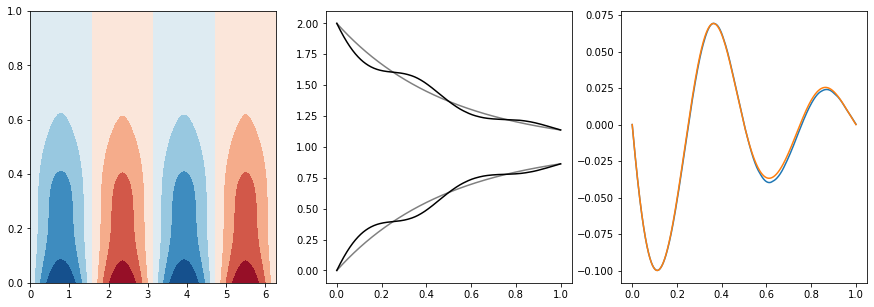

In [247]:
Nx = 400; Tf = 1; gamma = 2; Nt=1000
z = np.linspace(0, L, Nx); t = np.linspace(0,Tf, Nt)

t_span = (0,Tf)
u0 = (np.sin(gamma*z)+1)

result_fixed = scipy.integrate.solve_ivp(RHS_heat_equation, t_span, u0, 'BDF', atol = 1e-16, t_eval =t)
result_osc = scipy.integrate.solve_ivp(RHS_osc_heat_equation, t_span, u0, 'BDF', atol = 1e-12, t_eval =t)
u_fixed = result_fixed.y
u_osc = result_osc.y
print(f'IVP solved')
fig, ax=plt.subplots(nrows=1, ncols = 3, figsize = (15,5))
Z,T = np.meshgrid(z,t)
ax[0].contourf(Z,T,u_osc.T, cmap ='RdBu')
ax[1].plot(t, np.max(u_fixed, axis=0), color ='grey')
ax[1].plot(t, np.min(u_fixed, axis=0), color ='grey')
#ax[1].plot(t, np.trapz(u_fixed,z, axis=0))
ax[1].plot(t, np.max(u_osc, axis=0), color ='black')
ax[1].plot(t, np.min(u_osc, axis=0), color ='black')
ax[2].plot(t, np.max(u_osc, axis=0)-np.max(u_fixed, axis=0))
ax[2].plot(t, (np.exp(-gamma**2*D*delta/Omega*np.sin(Omega*t))-1)*np.exp(-gamma**2*D*t))
#ax[1].plot(t, np.trapz(u_osc,z, axis=0))
#plt.savefig('stoch_realization.jpg')
#plt.colorbar()
plt.show()

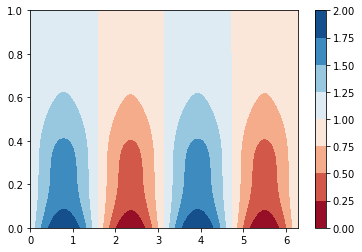

In [248]:
plt.contourf(Z,T,u_osc.T, cmap ='RdBu'); plt.colorbar()

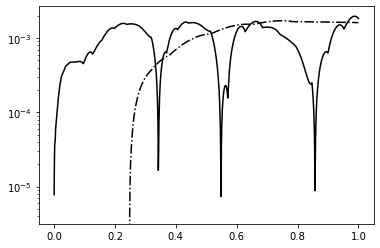

In [249]:
plt.semilogy(t, np.abs(np.max(u_osc, axis = 0) - 1-np.exp(- gamma**2*D*(t + delta/Omega*np.sin(Omega*t)))), 
           color ='black')
plt.semilogy(t, np.max(u_fixed, axis = 0) - 1 - np.exp(- gamma**2*D*t), '-.',color ='black')



## Burgers equation

In [264]:
# parameters
L = 2*np.pi; delta = 0.69; D = .1; Omega = 2*np.pi
def RHS_visc_burgers(t, eta):
    N = len(eta)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    return fft.ifft((n*np.pi*2*1j/L)**2*fft.fft(eta)).real*D-eta*fft.ifft((n*np.pi*2*1j/L)*fft.fft(eta)).real
def RHS_osc_visc_burgers(t, eta):
    N = len(eta)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    return fft.ifft((n*np.pi*2*1j/L)**2*fft.fft(eta)).real*D*(1+delta*np.cos(Omega*t))-eta*fft.ifft((n*np.pi*2*1j/L)*fft.fft(eta)).real


IVP solved


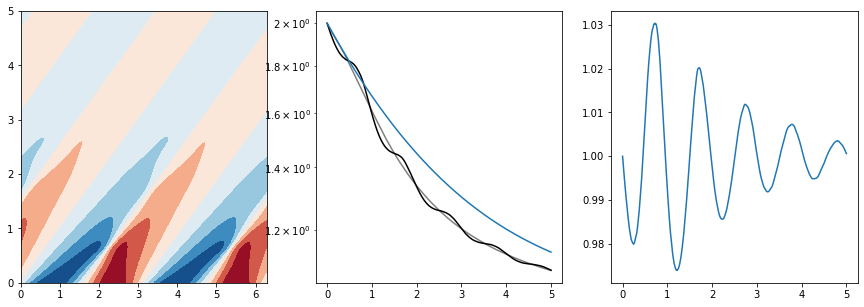

In [265]:
Nx = 500; Tf = 5; gamma = 2; Nt=2000
z = np.linspace(0, L, Nx); t = np.linspace(0,Tf, Nt)

t_span = (0,Tf)
u0 = (np.sin(gamma*z)+1)

result_burg = scipy.integrate.solve_ivp(RHS_visc_burgers, t_span, u0, 'BDF', atol = 1e-9, t_eval =t)
result_osc_burg = scipy.integrate.solve_ivp(RHS_osc_visc_burgers, t_span, u0, 'BDF', atol = 1e-12, t_eval =t)
u_burg = result_burg.y
u_osc_burg = result_osc_burg.y
print(f'IVP solved')
fig, ax=plt.subplots(nrows=1, ncols = 3, figsize = (15,5))
Z,T = np.meshgrid(z,t)
ax[0].contourf(Z,T,u_osc_burg.T, cmap ='RdBu')
ax[1].semilogy(t, np.max(u_burg, axis=0), color ='grey')
#ax[1].plot(t, np.min(u_burg, axis=0), color ='grey')
#ax[1].plot(t, np.trapz(u_fixed,z, axis=0))
ax[1].semilogy(t, np.max(u_osc_burg, axis=0), color ='black')
#ax[1].semilogy(t, np.min(u_osc_burg, axis=0), color ='black')
ax[1].semilogy(t, 1+np.exp(-gamma**2*D*t))
ax[2].plot(t, np.max(u_osc_burg, axis=0)/np.max(u_burg, axis=0))
#ax[2].plot(t, (np.exp(-gamma**2*D*delta/Omega*np.sin(Omega*t))-1)*np.exp(-gamma**2*D*t))
#ax[1].plot(t, np.trapz(u_osc,z, axis=0))
#plt.savefig('stoch_realization.jpg')
#plt.colorbar()
plt.show()

In [224]:
#plt.plot(z, u_burg[:,700])

In [182]:
# parameters
L = 2*np.pi; epsilon = 0.1; delta = 0.5; D = .05; Omega = 10*np.pi; Nx = 400

z = np.linspace(-L,L, Nx)
t = np.linspace(0.01, 5, 1000)
t_span = (0.01, 5)
Z,T = np.meshgrid(z,t)
u_analytic = 5*2*np.exp(-Z**2/4/T/D)*(np.exp(1/2/D)-1)*np.sqrt(D/np.pi/T)/(2+scipy.special.erfc(Z/2/np.sqrt(T*D))*(np.exp(1/2/D)-1))
u0 = np.exp(-z**2)*np.max(u_analytic)/np.max(np.exp(-z**2))
result_delta = scipy.integrate.solve_ivp(RHS_visc_burgers, t_span, u0, 'BDF', atol = 1e-10, t_eval =t)
print('Solved IVP')
u_delta_num = result_delta.y


Solved IVP


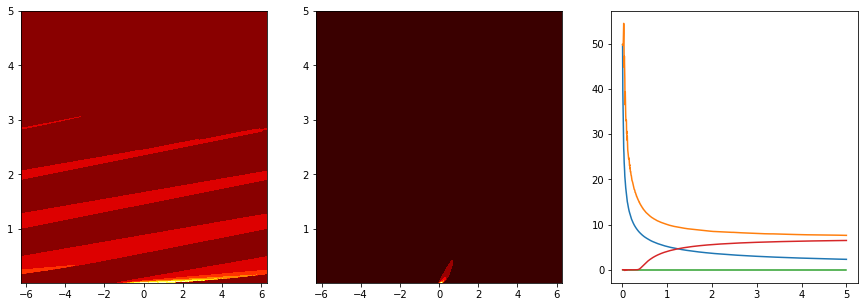

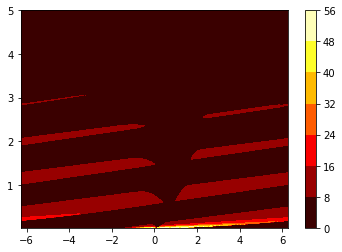

In [183]:
fig, ax=plt.subplots(nrows=1, ncols = 3, figsize = (15,5))
Z,T = np.meshgrid(z,t)
ax[0].contourf(Z,T,u_delta_num.T, cmap ='hot')
ax[1].contourf(Z,T,u_analytic, cmap ='hot')
ax[2].plot(t, np.max(u_analytic.T, axis=0))
ax[2].plot(t, np.max(u_delta_num, axis=0))
ax[2].plot(t, np.min(u_analytic.T, axis=0))
ax[2].plot(t, np.min(u_delta_num, axis=0))
#ax[1].plot(t, np.max(u_burg, axis=0), color ='grey')
#ax[1].plot(t, np.min(u_burg, axis=0), color ='grey')
#ax[1].plot(t, np.trapz(u_fixed,z, axis=0))
#ax[1].plot(t, np.max(u_osc_burg, axis=0), color ='black')
#ax[1].plot(t, np.min(u_osc_burg, axis=0), color ='black')
#ax[2].plot(t, np.max(u_osc_burg, axis=0)-np.max(u_burg, axis=0))
#ax[2].plot(t, (np.exp(-gamma**2*D*delta/Omega*np.sin(Omega*t))-1)*np.exp(-gamma**2*D*t))
#ax[1].plot(t, np.trapz(u_osc,z, axis=0))
#plt.savefig('stoch_realization.jpg')
#plt.colorbar()
plt.show()
plt.contourf(Z,T,np.abs(u_analytic-u_delta_num.T), cmap ='hot'); plt.colorbar()